In [1]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("survminer")
library(survminer)
install.packages("survival")
library(survival)
install.packages("ggplot2")
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggpubr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘survival’


The following object is masked from ‘package:survminer’:

    myeloma


The following object is masked from ‘package:caret’:

    cluster


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [42]:
# Leer el archivo CSV desde la URL
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_FOTL1.csv"
urlAge <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_age.csv"
df <- read_csv(url, show_col_types = FALSE)
df_age <- read_csv(urlAge, show_col_types = FALSE)

In [43]:
summary(df)

   equipment        operation           wo_type           base_model       
 Min.   : 100312   Length:59368       Length:59368       Length:59368      
 1st Qu.:1027127   Class :character   Class :character   Class :character  
 Median :1087502   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1017287                                                           
 3rd Qu.:1150612                                                           
 Max.   :1169630                                                           
 problem_code       problem_desc       failure_code       failure_desc      
 Length:59368       Length:59368       Length:59368       Length:59368      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [44]:
head(df,5)

equipment,operation,wo_type,base_model,problem_code,problem_desc,failure_code,failure_desc,cause_code,cause_desc,action_code,action_desc,mechanic,date,downtime_gross,pit_coverage,real_downtime,parts_cost,repair_hours,waiting_hours
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1083217,JOIN PANEL,Calibration,FD62,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC001,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,SEWA001,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Immer Sanchez,1/3/2023,1.00,1.00,0.00,$46.77,1,0.00
1083217,JOIN PANEL,Corrective Maintenance,FD62,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC013,Misadjusted machine head looper / Enlazador de cabezal desajustado,SEWA012,Adjust machine head looper / Ajustar enlazador de cabezal,Edwin Rogelio Galeas Perez,1/3/2023,2.25,2.25,0.00,$0.00,1,1.25
1083219,FLAT LOCK,Breakdown,FD62,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC001,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,SEWA001,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,"CASTILLO GIRON, EDWIN EDGARDO",6/10/2024,1.00,0.92,0.08,$0.00,1,0.00
1083221,JOIN PANEL,Corrective Maintenance,FD62,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC018,Misadjusted machine head presser foot / Prensatela de cabezal desajustado,SEWA015,Adjusted machine head presser foot / Ajustar prensatela de cabezal,"RAMIREZ RIVERA, ABEL ALBERTO",3/6/2024,1.25,1.17,0.08,$0.00,1,0.25
1083224,FLAT SEAM,Calibration,FD62,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC134,Damaged folder guide / Guía de doblillador en mal estado,SEWA126,Replace folder base / Reemplazar base del doblillador,Julia Margarita Chicas Diaz,4/19/2023,1.00,1.00,0.00,$44.02,1,0.00


**ANALISIS DE VARIABLES**

In [45]:
dim(df)

[1] 59368    20

In [46]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
operation_freq <- operation_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))

operation_freq

operation,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
HEM SLEEVE,9543,9543,0.1607432
HEM BOTTOM,6404,15947,0.2686127
SET SLEEVE,4322,20269,0.3414129
TAPE SHOULDER,3403,23672,0.3987333
JOIN PANEL,3303,26975,0.4543694
FLAT SEAM,2472,29447,0.4960080
HEM AROUND,2293,31740,0.5346315
SET COLLAR,2273,34013,0.5729181
JOIN SHOULDER,2224,36237,0.6103793


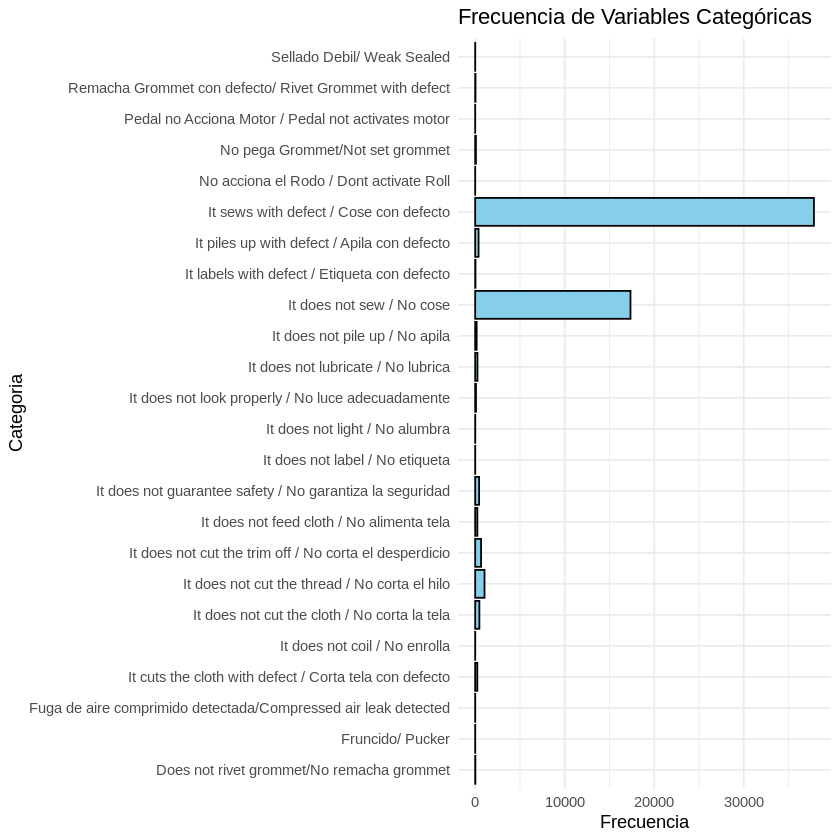

In [47]:
# Crear el gráfico de barras
ggplot(df, aes(y = problem_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()

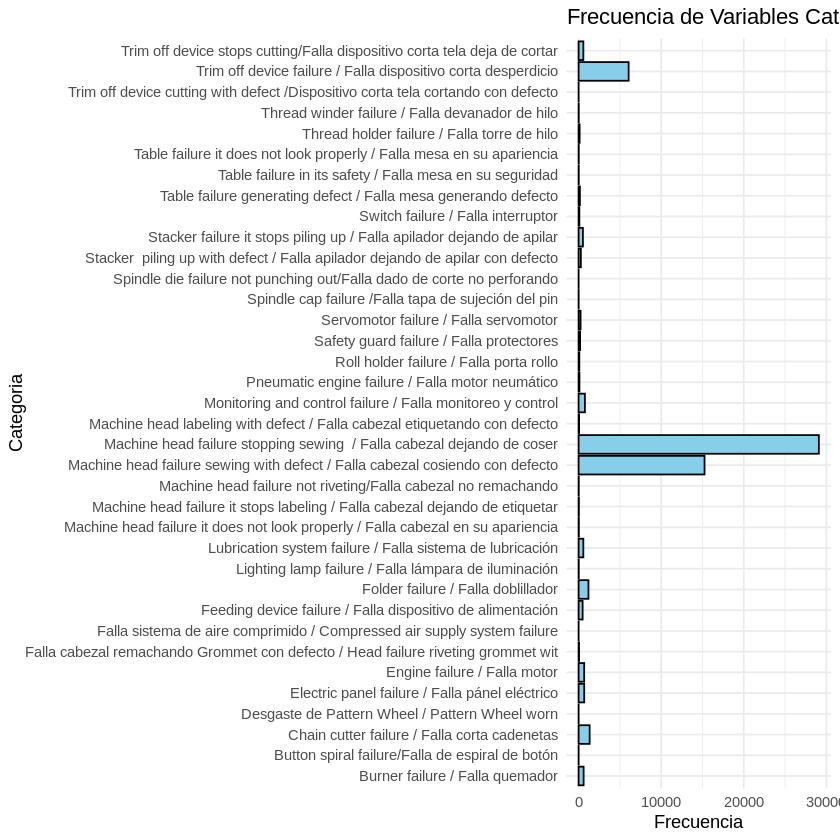

In [48]:
# Crear el gráfico de barras
ggplot(df, aes(y = failure_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()

In [49]:
# Calcular la frecuencia de causas de fallo
cause_freq <- df %>%
  group_by(cause_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
cause_freq <- cause_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
cause_freq

cause_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Misadjusted machine head looper / Enlazador de cabezal desajustado,9933,9933,0.1673124
Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,6131,16064,0.2705835
Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,4508,20572,0.3465166
Broken machine head ball joint / Rotura de biela de cabezal,4473,25045,0.4218603
Misadjusted machine head presser foot / Prensatela de cabezal desajustado,2710,27755,0.4675077
Misadjusted machine head chopper / Cuchilla de cabezal desajustada,2480,30235,0.5092811
Misadjusted machine head teeth / Dientes de cabezal desajustados,2399,32634,0.5496901
Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,1969,34603,0.5828561
Oil leak in machine head / Fuga de aceite lubricante en cabezal,1273,35876,0.6042986


In [50]:
# Calcular la frecuencia de acciones correctivas
action_freq <- df %>%
  group_by(action_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
action_freq <- action_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
action_freq

action_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Adjust machine head looper / Ajustar enlazador de cabezal,7828,7828,0.1318555
Adjust machine head needle guard / Ajustar guarda aguja de cabezal,4534,12362,0.2082267
Replace machine head ball joint / Reemplazar biela de cabezal,4500,16862,0.2840251
Adjust machine head teeth / Ajustar dientes de cabezal,3987,20849,0.3511825
Sharpen knife / Afilar cuchillas,3954,24803,0.4177840
Replace trim off knife / Reemplazar cuchilla de corta desperdicio,3178,27981,0.4713145
Adjusted machine head presser foot / Ajustar prensatela de cabezal,2987,30968,0.5216278
Replace machine head looper / Reemplazar enlazador de cabezal,2936,33904,0.5710821
Adjust machine head knife / Ajustar cuchilla de cabezal,1893,35797,0.6029679


In [51]:
# Calcular la frecuencia de acciones correctivas
mechanic_freq <- df %>%
  group_by(mechanic) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
mechanic_freq <- mechanic_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
mechanic_freq

mechanic,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Antony Ulloa,1865,1865,0.03141423
Omar Maldonado,1476,3341,0.05627611
Edwin Colindres,1396,4737,0.07979046
Carlos De Leon,1173,5910,0.09954858
Jose Manuel Perez Zepeda,1148,7058,0.11888559
DENY RAYMUNDO PUCH POOL,1000,8058,0.13572969
Erick Garcia Lima,979,9037,0.15222005
Ronald Antonio Herrera,919,9956,0.16769977
Carlos Alberto Alfaro Salamanca,891,10847,0.18270786


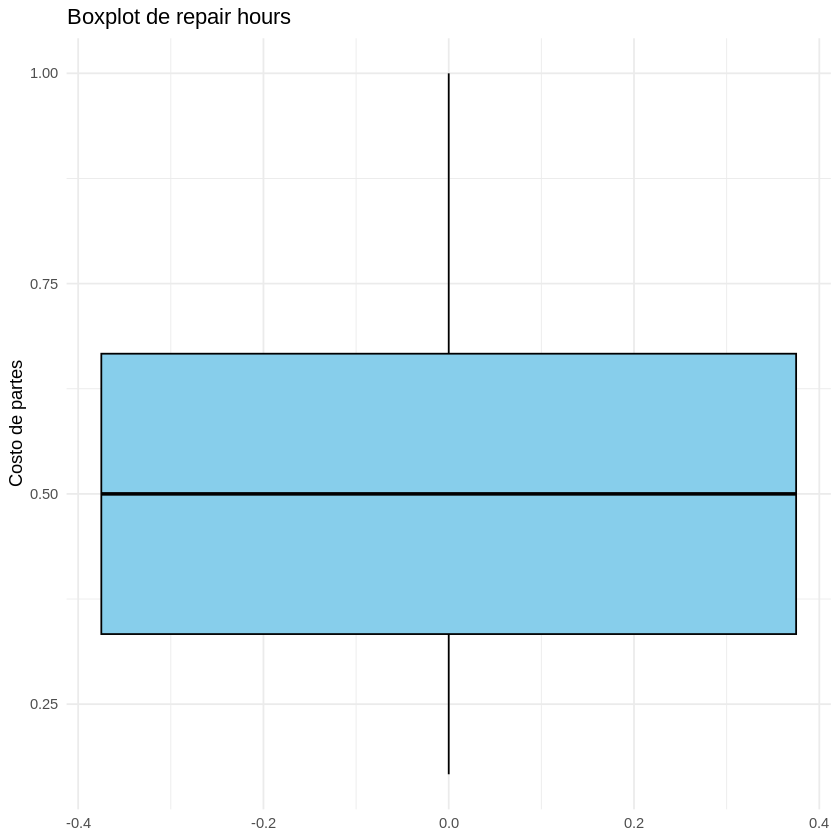

In [52]:
# Crear el boxplot de repair_hours
ggplot(df, aes(y = repair_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de repair hours',
       y = 'Costo de partes') +
  theme_minimal()

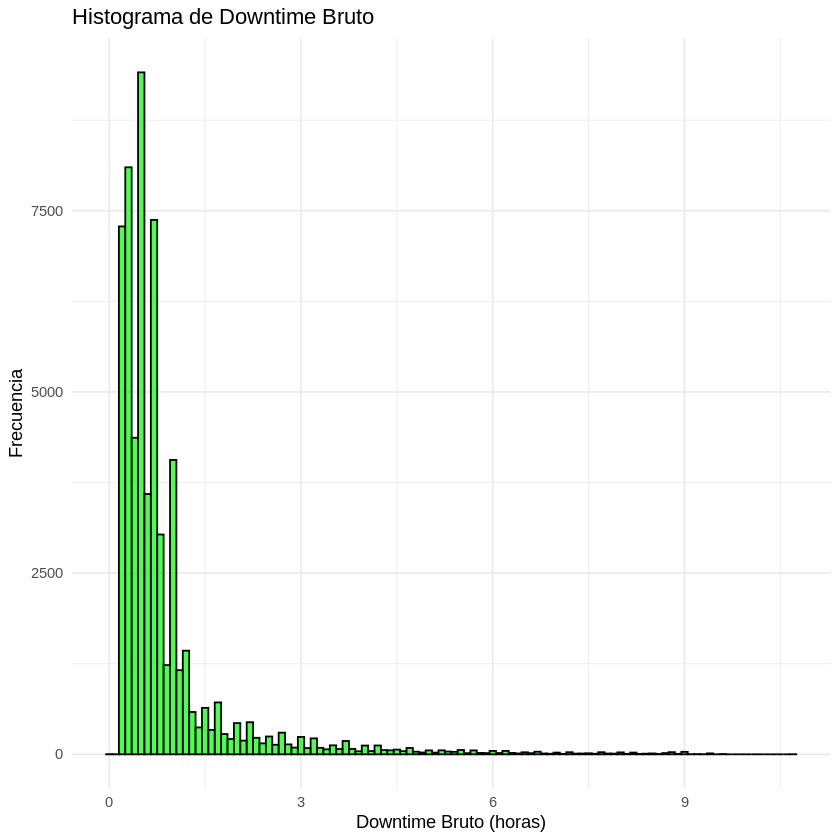

In [53]:
# Histograma de 'downtimeGross'
hist_downtimeGross <- ggplot(df, aes(x = downtime_gross)) +
  geom_histogram(binwidth = 0.1, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Downtime Bruto (horas)",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)

**LIMPIEZA DE DATOS**

In [54]:
sapply(df, function(x) sum(is.na(x)))

equipment      operation        wo_type     base_model   problem_code 
             0              0              0              0              0 
  problem_desc   failure_code   failure_desc     cause_code     cause_desc 
             0              0              0              0              0 
   action_code    action_desc       mechanic           date downtime_gross 
             0              0              0              0              0 
  pit_coverage  real_downtime     parts_cost   repair_hours  waiting_hours 
             0              0              0              0              0

In [55]:
# Remover el símbolo de dólar y las comas, y convertir a float
df$parts_cost <- as.numeric(gsub("[\\$,()]", "", df$parts_cost))

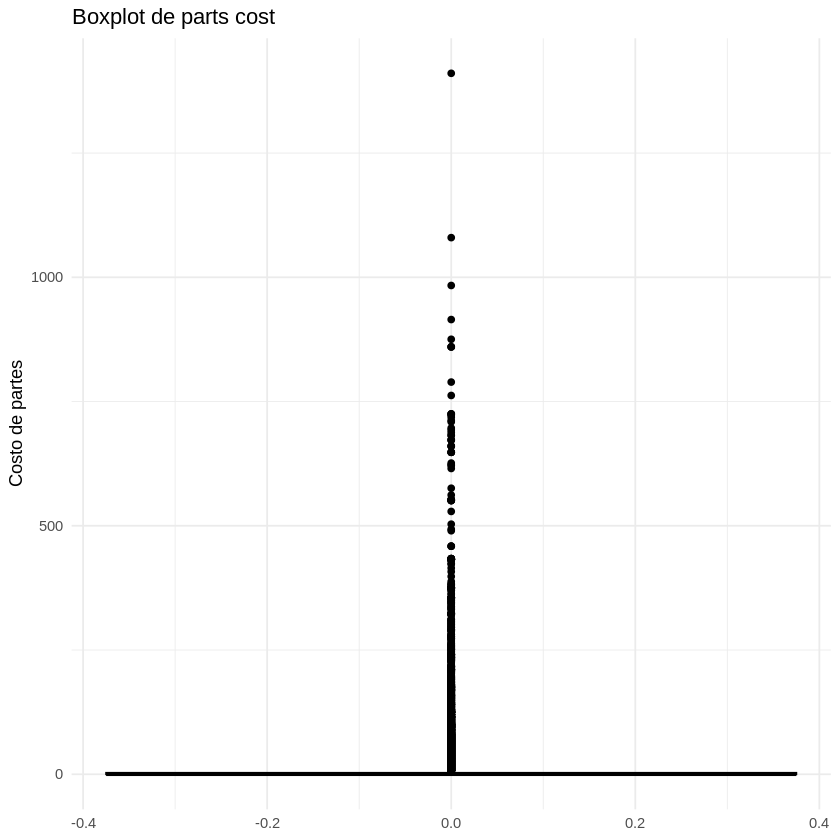

In [56]:
# Crear el boxplot de parts_cost
ggplot(df, aes(y = parts_cost)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de parts cost',
       y = 'Costo de partes') +
  theme_minimal()

In [57]:
# Convertir la columna 'Date' al formato adecuado
df$date <- as.Date(df$date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(date)

In [58]:
mean(df$downtime_gross < 0)

[1] 0

In [59]:
# Filtrar registros donde downtimeGross no sea negativo
df_filtered <- df %>%
  filter(downtime_gross >= 0)

In [60]:
mean(df$repair_hours < 0)

[1] 0

In [61]:
# Calcular valor absoluto de repair hours
df$repair_hours <- abs(df$repair_hours)

In [62]:
#Eliminar columnas que no seran utilizadas
df <- select(df, -problem_code, -failure_code, -cause_code, -action_code, -pit_coverage, -real_downtime, -waiting_hours)

In [63]:
# Calcular la diferencia en días entre la fecha actual y la fecha del último mantenimiento preventivo registrado para cada equipo
df <- df %>%
  group_by(equipment) %>%
  mutate(Time_Since_Last_Preventive_Maintenance = ifelse(`wo_type` == "Preventative Maintenance", difftime(max(date), date, units = "days"), 0))

In [64]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`wo_type` == "Corrective Maintenance")

In [65]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(equipment) %>%
  mutate(Days_Between_Failures = difftime(date, lag(date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [66]:
# Convertir 'Days_Between_Failures' a numeric
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures, units = "days")

**ANALISIS DE VARIABLE OBJETIVO**

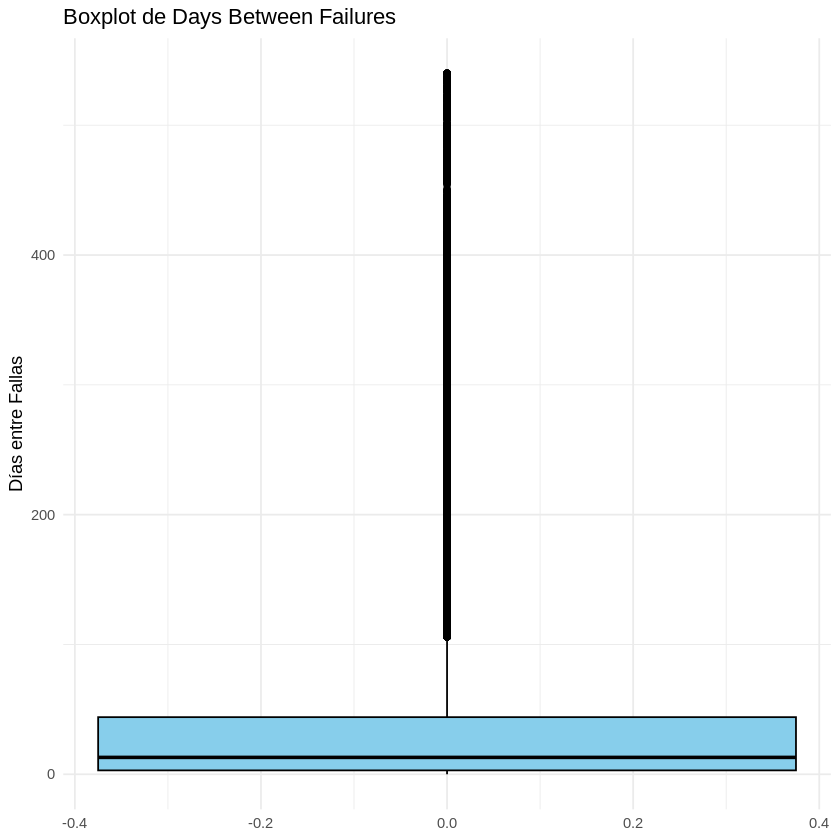

In [67]:
# Crear el boxplot de daysbetween_failures
ggplot(df, aes(y = Days_Between_Failures)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de Days Between Failures',
       y = 'Días entre Fallas') +
  theme_minimal()

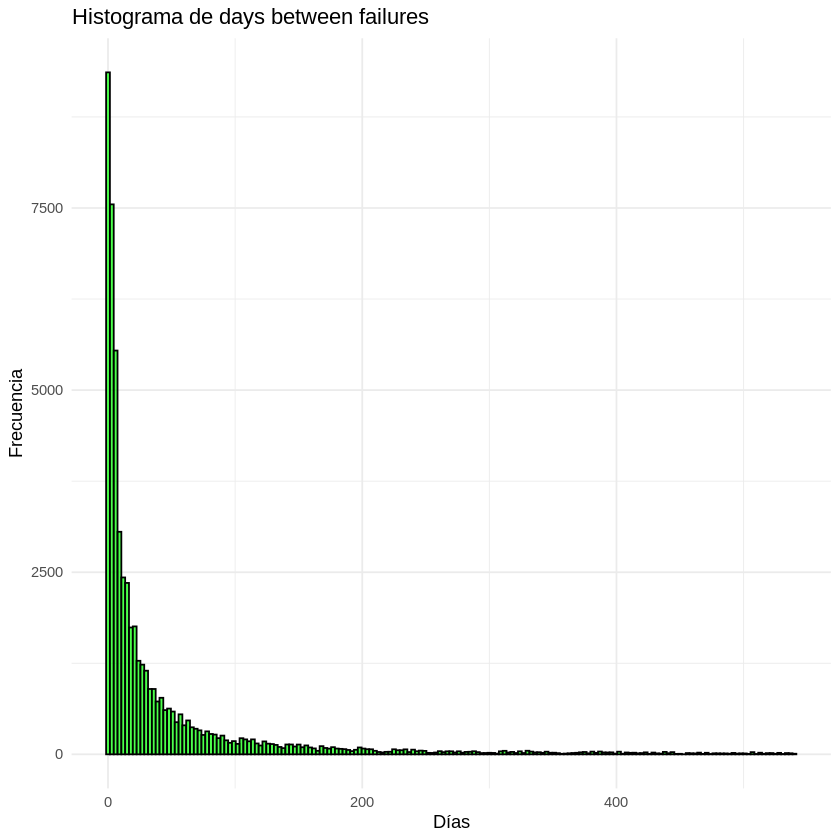

In [68]:
# Histograma de 'Days_Between_Failures'
hist_days_failures <- ggplot(df, aes(x = Days_Between_Failures)) +
  geom_histogram(binwidth = 3, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de days between failures",
       x = "Días",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_days_failures)

**MODELO DE REGRESION LINEAL INICIAL PARA PREDECIR DAYS BETWEEN FAILURES**



In [69]:
df <- select(df, -wo_type, -date)

In [70]:
# Inicializar y ajustar el modelo de regresión lineal
model1 <- lm(Days_Between_Failures~. -equipment -Time_Since_Last_Preventive_Maintenance, data = df)
# Resumen del modelo
summary(model1)


Call:
lm(formula = Days_Between_Failures ~ . - equipment - Time_Since_Last_Preventive_Maintenance, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-368.24  -31.60   -9.96    7.08  508.77 

Coefficients: (17 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                   -20.26066
operationBARTACK                                                                                6.97194
operationBIND ARM                                                                               3.52383
operationBIND ARMHOLE                                                                           6.96074
operationBIND LEG                                                                              13.51041
operationBIND NECK                                                                              8.25766
opera

**CALCULO DE VARIABLES PARA MEJORA DEL AJUSTE**

In [71]:
#Calcular los fallos acumulativos
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [72]:
# Calcular la mediana de tiempo de reparación
df <- df %>%
  group_by(equipment) %>%
  mutate(Median_Repair_Time = median(repair_hours, na.rm = TRUE))

In [73]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(parts_cost))

**MODELO DE REGRESION LINEAL PARA PREDECIR DAYS BETWEEN FAILURES CON MAS VARIABLES**

In [74]:
# Inicializar y ajustar el modelo de regresión lineal
model2 <- lm(Days_Between_Failures~. -equipment, data = df)
# Resumen del modelo
summary(model2)


Call:
lm(formula = Days_Between_Failures ~ . - equipment, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-367.53  -32.00  -11.44   10.14  499.81 

Coefficients: (18 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                  -2.630e+01
operationBARTACK                                                                              8.251e+00
operationBIND ARM                                                                             1.208e+00
operationBIND ARMHOLE                                                                         2.594e+00
operationBIND LEG                                                                             1.089e+01
operationBIND NECK                                                                            5.976e+00
operationCLOSE NECK                                

**MODELO AGREGANDO LA VARIABLE "MACHINE AGE"**

In [77]:
# Renombrar la columna 'Equipment' a 'equipment' en df_age
df_age <- df_age %>% rename(equipment = Equipment)

In [81]:
df_merged <- df %>%
  left_join(df_age %>% select(equipment, Age), by = "equipment")

In [82]:
head(df_merged,5)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,downtime_gross,parts_cost,repair_hours,Time_Since_Last_Preventive_Maintenance,Days_Between_Failures,Cumulative_Failure_Count,Median_Repair_Time,Cumulative_Maintenance_Cost,Age
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1083217,JOIN PANEL,FD62,It does not sew / No cose,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head looper / Enlazador de cabezal desajustado,Adjust machine head looper / Ajustar enlazador de cabezal,Edwin Rogelio Galeas Perez,2.2500000,0.00,1.0000000,0,2,1,0.5000000,0.00,24
1156767,TAPE SHOULDER,J-261,It does not look properly / No luce adecuadamente,Safety guard failure / Falla protectores,Loose engine belt guard / Protector de banda de motor flojo,Tighten engine belt guard screw / Apretar tornillos de protector de banda,NERY MENA RODRIGUEZ,0.6666667,8.60,0.6666667,0,2,1,0.6666667,8.60,24
1108020,TAPE SHOULDER,LDA-L26,It does not look properly / No luce adecuadamente,Safety guard failure / Falla protectores,Loose engine belt guard / Protector de banda de motor flojo,Tighten engine belt guard screw / Apretar tornillos de protector de banda,NERY MENA RODRIGUEZ,0.5833333,8.60,0.5833333,0,2,1,0.5000000,8.60,22
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,RAMON VILLANUEVA,0.5000000,60.69,0.5000000,0,2,1,0.4083333,60.69,17
1154605,FIRST SIDE,C5,It does not sew / No cose,Machine head failure stopping sewing / Falla cabezal dejando de coser,Broken machine head ball joint / Rotura de biela de cabezal,Replace machine head ball joint / Reemplazar biela de cabezal,Richard Lara,0.5000000,5.00,0.5000000,0,2,1,0.5000000,5.00,22


In [83]:
# Inicializar y ajustar el modelo de regresión lineal
model3 <- lm(Days_Between_Failures~. -equipment, data = df_merged)
# Resumen del modelo
summary(model3)


Call:
lm(formula = Days_Between_Failures ~ . - equipment, data = df_merged)

Residuals:
    Min      1Q  Median      3Q     Max 
-374.46  -31.88  -10.58   11.88  511.37 

Coefficients: (18 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                   3.287e-01
operationBARTACK                                                                              3.948e+00
operationBIND ARM                                                                             6.483e+00
operationBIND ARMHOLE                                                                         4.769e+00
operationBIND LEG                                                                             6.997e+00
operationBIND NECK                                                                            5.351e+00
operationCLOSE NECK                         

**IMPLEMENTACION DE BACKWARD**

In [ ]:
# Realizar backward elimination
model_final <- step(model3, direction = "backward")
model_final$anova

In [ ]:
formula = as.formula("Days_Between_Failures ~ operation + base_model + problem_desc +
    failure_desc + mechanic + downtime_gross + parts_cost + repair_hours +
    Cumulative_Failure_Count + Median_Repair_Time + Cumulative_Maintenance_Cost")

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model4 <- lm(formula = formula, data = df)
# Resumen del modelo
summary(model4)

**ANALISIS DE SUPERVIVENCIA PARA MAQUINARIA DE RUEDO DE MANGA**

In [ ]:
# Cargar datos
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/maquina2.csv"
data <- read_csv(url, show_col_types = FALSE)

In [ ]:
head(data,5)

In [ ]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
data <- data %>%
  filter(`WO Type` == "Corrective Maintenance")
data <- data%>%
  filter(Operation == "HEM SLEEVE")

In [ ]:
# Convertir la columna 'Date' al formato adecuado
data$Date <- as.Date(data$Date, format="%m/%d/%Y")  # Ajusta el formato según tus datos

# Ordenar por equipo y fecha
data <- data %>% arrange(Equipment, Date)

# Calcular el tiempo entre fallas y si la falla ocurrió
data <- data %>%
  group_by(Equipment) %>%
  mutate(Previous_Failure_Date = lag(Date),
         Days_Between_Failures = as.numeric(Date - Previous_Failure_Date),
         Event_Occurred = ifelse(is.na(Previous_Failure_Date), 0, 1)) %>%
  ungroup()

# Eliminar filas con NA en 'Days_Between_Failures'
data <- data %>% filter(!is.na(Days_Between_Failures))

In [ ]:
head(data,5)

In [ ]:
# Convertir las variables categóricas a factores
data$Equipment <- as.factor(data$Equipment)
data$Operation <- as.factor(data$Operation)
data$Model.Base <- as.factor(data$`Model Base`)
data$Problem.Code <- as.factor(data$`Problem Code`)
data$Failure.Code <- as.factor(data$`Failure Code`)
data$Cause.Code <- as.factor(data$`Cause Code`)
data$Action.Code <- as.factor(data$`Action Code`)

In [ ]:
cox_model <- coxph(Surv(Days_Between_Failures, Event_Occurred) ~
                  Model.Base + Problem.Code + Failure.Code + Cause.Code +
                   Action.Code + downtimeGross + partsCost +repairHours, data = data)

In [ ]:
# Resumen del modelo
summary(cox_model)

In [ ]:
# Curvas de supervivencia ajustadas
fit <- survfit(cox_model)
ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
           title = "Curvas de Supervivencia Ajustadas",
           xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia")


In [ ]:
# Imprimir el resumen del ajuste para ver la mediana de supervivencia
summary_fit <- summary(fit)
print(summary_fit)

# Obtener la mediana de supervivencia
median_survival <- summary_fit$time[which.min(abs(summary_fit$surv - 0.5))]
print(paste("La mediana de supervivencia es:", median_survival, "días"))

In [ ]:
library(ggplot2)
library(survminer)

# Graficar la curva de supervivencia con la mediana de supervivencia resaltada
plot <- ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
                   title = "Curvas de Supervivencia Ajustadas",
                   xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia",
                   conf.int = TRUE)

# Añadir línea vertical y anotación para la mediana de supervivencia
plot$plot <- plot$plot +
  geom_vline(xintercept = median_survival, linetype = "dashed", color = "red") +
  annotate("text", x = median_survival, y = 0.5, label = paste("Mediana =", median_survival, "días"), vjust = -1, color = "red")

print(plot)